### **RANDOM FOREST (FEATURE IMPORTANCE)**

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.datasets import load_diabetes
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Lasso
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from scipy.stats import norm, skew, ttest_ind, f_oneway
from sklearn.preprocessing import LabelEncoder, StandardScaler, PowerTransformer

from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVC
from sklearn.ensemble import VotingRegressor
from sklearn.neural_network import MLPRegressor
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames :
        print(os.path.join(dirname, filename))
from sklearn.datasets import make_circles

In [57]:
from google.colab import files
uploaded = files.upload()

df=pd.read_csv('heart.csv')
df.head()

Saving heart.csv to heart (3).csv


,age,sex,chest_pain_type,resting_bp,cholestoral,fasting_blood_sugar,restecg,max_hr,exang,oldpeak,slope,num_major_vessels,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [58]:
x= df.drop('target',axis=1)
y= df['target']

In [59]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [60]:
clf=DecisionTreeClassifier()

In [61]:
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [62]:
y_pred=clf.predict(x_test)
accuracy_score(y_test,y_pred)

0.8360655737704918

In [89]:
from sklearn.metrics import precision_score, recall_score
print(recall_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(r2_score(y_test,y_pred))

0.78125
0.8928571428571429
0.34267241379310354


[Text(0.5733173076923077, 0.95, 'x[2] <= 0.5\ngini = 0.495\nsamples = 242\nvalue = [109, 133]'),
 Text(0.31490384615384615, 0.85, 'x[11] <= 0.5\ngini = 0.413\nsamples = 110\nvalue = [78, 32]'),
 Text(0.4441105769230769, 0.8999999999999999, 'True  '),
 Text(0.1875, 0.75, 'x[8] <= 0.5\ngini = 0.498\nsamples = 53\nvalue = [25, 28]'),
 Text(0.07692307692307693, 0.65, 'x[12] <= 2.5\ngini = 0.302\nsamples = 27\nvalue = [5, 22]'),
 Text(0.038461538461538464, 0.55, 'x[4] <= 316.5\ngini = 0.095\nsamples = 20\nvalue = [1, 19]'),
 Text(0.019230769230769232, 0.45, 'gini = 0.0\nsamples = 18\nvalue = [0, 18]'),
 Text(0.057692307692307696, 0.45, 'x[7] <= 163.0\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.038461538461538464, 0.35, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.07692307692307693, 0.35, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.11538461538461539, 0.55, 'x[6] <= 0.5\ngini = 0.49\nsamples = 7\nvalue = [4, 3]'),
 Text(0.09615384615384616, 0.45, 'gini = 0.0\nsamples = 

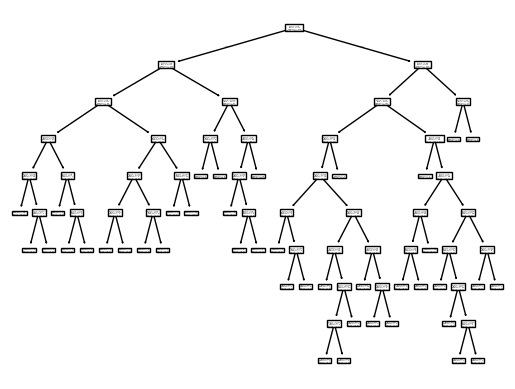

In [63]:
plot_tree(clf)

In [64]:
clf.feature_importances_

array([0.10951688, 0.04101489, 0.2252627 , 0.07023557, 0.10295304,
       0.        , 0.01609693, 0.05759472, 0.07542094, 0.10353043,
       0.03996229, 0.13308409, 0.02532753])

In [65]:
feature_importance = clf.feature_importances_
feature_names = x.columns

# Create a DataFrame to display feature importance with feature names
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

feature_importance_df

,Feature,Importance
2,chest_pain_type,0.225263
11,num_major_vessels,0.133084
0,age,0.109517
9,oldpeak,0.103530
4,cholestoral,0.102953
8,exang,0.075421
3,resting_bp,0.070236
7,max_hr,0.057595
1,sex,0.041015
10,slope,0.039962


In [77]:
df1= df[['chest_pain_type','age','num_major_vessels','cholestoral','oldpeak','exang','resting_bp','max_hr','sex']]

In [78]:
x1_train,x1_test,y1_train,y1_test = train_test_split(df1,y,test_size=0.2,random_state=42)

In [79]:
clf.fit(x1_train,y1_train)

DecisionTreeClassifier()

In [80]:
y_pred1=clf.predict(x1_test)

In [81]:
accuracy_score(y1_test,y_pred1)

0.7868852459016393

In [91]:
print(recall_score(y1_test,y_pred1))
print(precision_score(y1_test,y_pred1))
print(r2_score(y1_test,y_pred1))

0.71875
0.8518518518518519
0.1454741379310346
